___
# MINIPROJETO 1

## <font color='red'>Yago Ribeiro Labate</font>
___

## <font color='blue'>Número de Celulares em 2011, a cada 100 pessoas</font>

___
### Itens 1 a 3 - Resolução:

In [566]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math
from astropy.table import Table, Column


print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Yago\Desktop\Faculdade\2 Semestre\Ciencia dos dados\Mini Projetos\Mini Projeto 1


### Item 1

In [417]:
dados = pd.read_excel('cell phone per 100.xlsx')

In [418]:
dados.head()

,Mobile cellular subscriptions (per 100 people),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.101462,0.778857,2.247739,4.345509,8.867979,16.016337,26.470880,34.338687,41.385796,54.262080
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,27.542432,35.407334,40.308673,48.705965,60.504364,73.270708,58.453315,77.167390,84.024138,96.393395
4,Algeria,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,1.431990,4.533908,15.071017,41.538459,62.883274,81.290123,78.515888,93.647115,92.421261,98.987590


### Item 2

In [419]:
# Selecionando apenas a variável com a qual irei trabalhar e retirando os NaN

celulares = dados['2011']
celulares = celulares.dropna()


### Item 3

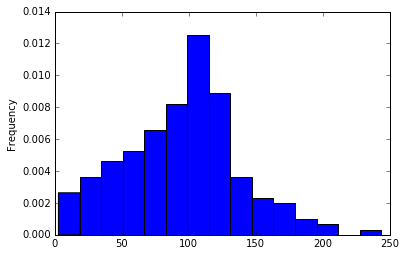

In [420]:
celulares.plot.hist(bins=15, normed=1)


### Itens 4 a 6 - Resolução:

### Item 4

** A distribuição de dados da variável escolhida é assimétrica positiva. Visto isso, serão utilizados os modelos teóricos  gumbel à direta e gamma, já que ambas obedecem a forma do histograma da minha variável.  **

### Item 5

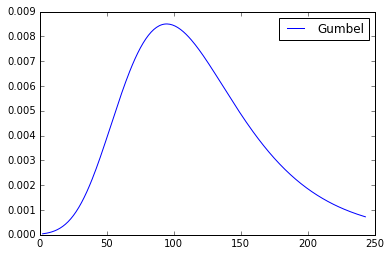

In [592]:
# Parâmetros estimados para a função gumbel à direita, sendo eles a média e o desvio padrão

x = np.arange(2,244,1)
plt.plot(x,stats.gumbel_r.pdf(x,celulares.mean(), celulares.std()))
plt.legend(['Gumbel'])

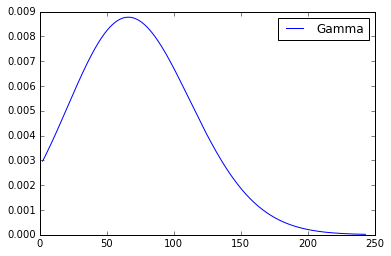

In [591]:
# Parâmetros estimados para a função gumbel à direita, sendo eles aleatórios, escolhidos por tentativas.

plt.plot(x,stats.gamma.pdf(x,130, -450, 4))
plt.legend(['Gamma'])

### Item 6

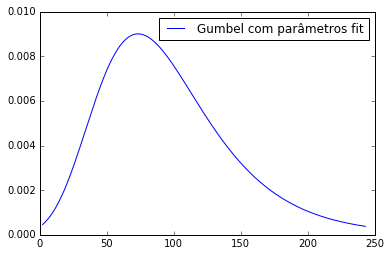

In [589]:
# Utilizando o fit para a gumbel

g = stats.gumbel_r.fit(celulares)
plt.plot(x,stats.gumbel_r.pdf(x,g[0],g[1]))
plt.legend(['Gumbel com parâmetros fit'])

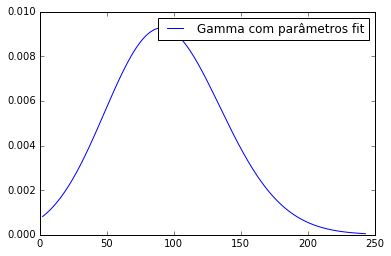

In [590]:
# Utilizando o fit para a gamma

gm = stats.gamma.fit(celulares)
plt.plot(x,stats.gamma.pdf(x,gm[0],gm[1],gm[2]))
plt.legend(['Gamma com parâmetros fit'])

** Comparando o fit com os parametros estimados: **

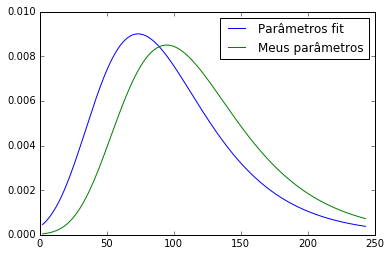

In [425]:
# Comparação para a gumbel

plt.plot(x,stats.gumbel_r.pdf(x,g[0],g[1]))
plt.plot(x,stats.gumbel_r.pdf(x,celulares.mean(), celulares.std()))
plt.legend(['Parâmetros fit','Meus parâmetros'])

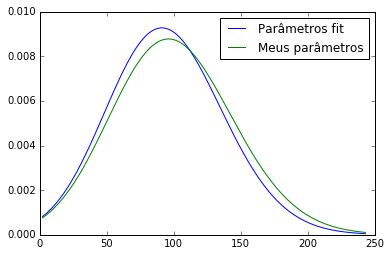

In [426]:
# Comparação para a gamma

plt.plot(x,stats.gamma.pdf(x,gm[0],gm[1],gm[2]))
plt.plot(x,stats.gamma.pdf(x,130, -420, 4))
plt.legend(['Parâmetros fit','Meus parâmetros'])

** Para ambos os modelos, serão optados os parâmetros obtidos pelo fit. **

___
### Itens 7 a 9 - Resolução:

### Item 7

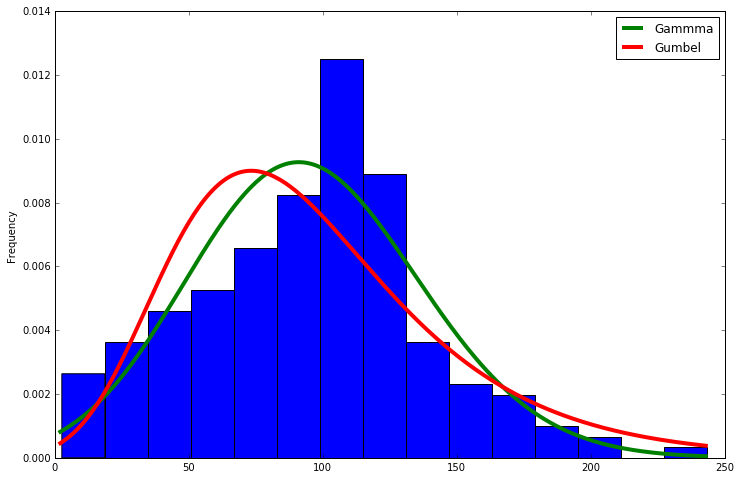

In [501]:
fig = plt.figure(figsize=(12,8))
celulares.plot.hist(bins=15,normed=1)
plt.plot(x,stats.gamma.pdf(x,gm[0],gm[1],gm[2]),lw = 4)
plt.plot(x,stats.gumbel_r.pdf(x,g[0],g[1]), lw = 4)
plt.legend(['Gammma','Gumbel'])


** Qualitativamente as retas obtidas por cada modelo estão iguais ao histograma da variável. Por outro lado, isso não ocorre fielmente no caso quantitativo, uma vez que os valores não estão exatamente iguais aos do histograma. ** 

### Item 8

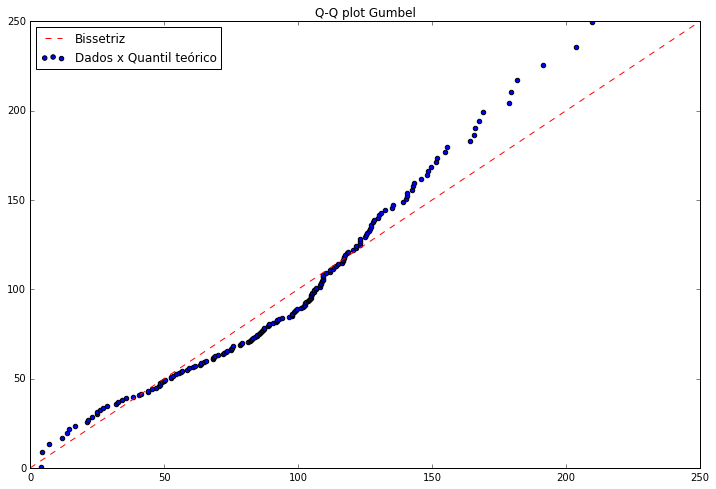

In [540]:
# Gumbel:

x2 = np.linspace(celulares.min(),celulares.max(),celulares.count())
fae = [] #Frequencia relativa acumulada dos dados

celulares_ordenados = sorted(celulares)

qtG = [] #Quantil teórico de Gumbel

for i in range(len(x2)):
    if (i-0.5)/len(x2) < 0:
        fae.append(0)
    else:
        fae.append((i-0.5)/len(x2))
        
    qtG.append(stats.gumbel_r.ppf(fae[i], g[0],g[1]))
    
fig = plt.figure(figsize=(12,8))
plt.scatter(celulares_ordenados,qtG)
plt.plot([0,250],[0,250], 'r--')
plt.axis([0,250,0,250])
plt.title('Q-Q plot Gumbel')
plt.legend(['Bissetriz', 'Dados x Quantil teórico'], loc= 'best')


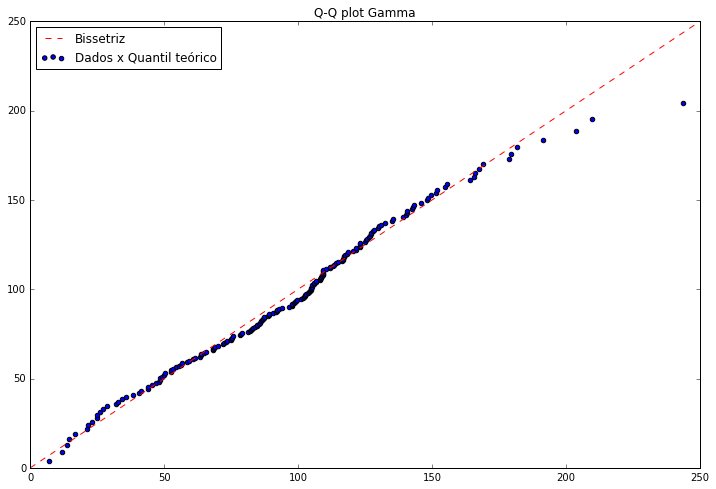

In [541]:
# Gamma:

qtGm = [] #Quantil teórico de Gamma

for i in range(len(x2)):
    qtGm.append(stats.gamma.ppf(fae[i], gm[0],gm[1],gm[2]))
    
fig = plt.figure(figsize=(12,8))
plt.scatter(celulares_ordenados,qtGm)
plt.plot([0,250],[0,250], 'r--')
plt.axis([0,250,0,250])
plt.title('Q-Q plot Gamma')
plt.legend(['Bissetriz', 'Dados x Quantil teórico'], loc= 'best')

### Item 9

[0, 1, 0, 1]

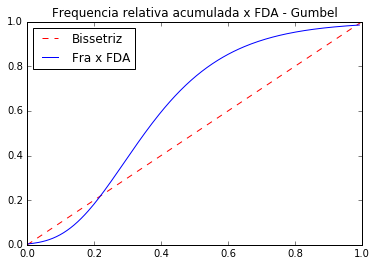

In [542]:
# Gumbel


plt.plot([0,1],[0,1], 'r--')
plt.plot(fae,stats.gumbel_r.cdf(x2, g[0],g[1]))
plt.title('Frequencia relativa acumulada x FDA - Gumbel')
plt.legend(['Bissetriz', 'Fra x FDA'], loc= 'best')
plt.axis([0,1,0,1])


[0, 1, 0, 1]

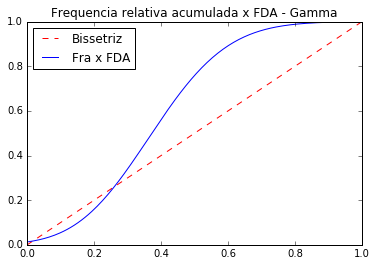

In [543]:
# Gamma

plt.plot([0,1],[0,1], 'r--')
plt.plot(fae,stats.gamma.cdf(x2, gm[0],gm[1],gm[2]))
plt.title('Frequencia relativa acumulada x FDA - Gamma')
plt.legend(['Bissetriz', 'Fra x FDA'], loc= 'best')
plt.axis([0,1,0,1])

___
### Itens 10 e 11 - Resolução:

### Item 10

** Erro quadrático nas CDFs: **


In [562]:
cdf_gumbel = []
cdf_gamma = []

for i in stats.gumbel_r.cdf(x2, g[0],g[1]):
    cdf_gumbel.append(i)

for i in stats.gamma.cdf(x2, gm[0],gm[1],gm[2]):
    cdf_gamma.append(i)
    

erro_quad_cdf_gumbel = 0
erro_quad_cdf_gamma = 0

for i in range(len(x2)):
    erro_quad_cdf_gumbel += (fae[i] - cdf_gumbel[i])**2
    erro_quad_cdf_gamma += (fae[i] - cdf_gamma[i])**2
    
print('Erro quadrático da cdf de gumbel vs a frequência relativa acumulada:',erro_quad_cdf_gumbel)
print('Erro quadrático da cdf de gamma vs a frequência relativa acumulada:',erro_quad_cdf_gamma)



Erro quadrático da cdf de gumbel vs a frequência relativa acumulada: 4.76039323609
Erro quadrático da cdf de gumbel vs a frequência relativa acumulada: 5.59253462276


** Diferenças absolutas das CDFs vs F.R.A. **

In [563]:
dif_cdf_gumbel = 0
dif_cdf_gamma = 0

for i in range(len(x2)):
    dif_cdf_gumbel += abs(fae[i] - cdf_gumbel[i])
    dif_cdf_gamma += abs(fae[i] - cdf_gamma[i])
    
print('Erro da soma do módulo das diferenças da cdf de gumbel vs a frequência relativa acumulada:',dif_cdf_gumbel)
print('Erro da soma do módulo das diferenças da gammma vs a frequência relativa acumulada:',dif_cdf_gamma)

Erro da soma do módulo das diferenças da cdf de gumbel vs a frequência relativa acumulada: 24.7902061327
Erro da soma do módulo das diferenças da gammma vs a frequência relativa acumulada: 26.23602367


### Item 11:

In [584]:
t = Table()
t['Modelos e erros'] = ['Gumbel - Erro quadrático e da somas na CDF:', 'Gamma - Erro quadrático e da somas na CDF:']
t['Valor dos erros'] = [(erro_quad_cdf_gumbel,dif_cdf_gumbel), (erro_quad_cdf_gamma,dif_cdf_gamma)]


t


Modelos e erros,Valor dos erros [2]
str43,float64
Gumbel - Erro quadrático e da somas na CDF:,4.76039323609 .. 24.7902061327
Gamma - Erro quadrático e da somas na CDF:,5.59253462276 .. 26.23602367


** A partir dos erros de cada modelo, nota-se que o modelo Gumbel possui mais aderência que o modelo Gamma. Portando, o Gumbel é o melhor modelo para ajustar os dados da minha variável  ** 